# My Job Applications 2023

***

## Imports & Stored Data

In [1]:
# import numpy as np
# import pandas as pd
# from datetime import datetime
# from collections import Counter
# from dateutil.relativedelta import relativedelta

from py_files.data_functions import add_app, add_init_response, add_interview_info,\
    add_more_ints, add_final_response, concat_dfs, add_to_json, view_data

from py_files.visualization_functions import job_categories, initial_responses, \
    apps_timeline, explore_data
from py_files.subplots import two_by_two

In [2]:
view_data()

,,job_title,job_cat,department,location,recruiter,referral,method,url,initial_response,date_init_resp,date_interview1,interviewers,interview_notes,next_steps,next_interviews,final_outcome,feedback
company_name,date_applied,,,,,,,,,,,,,,,,,
Accenture,2023-01-04,Trainee Data - AI/Big Data Analytics/Data Mana...,Data Analyst,NaN,Germany,NaN,Niamh,Accenture website,https://www.accenture.com/us-en/careers/jobdet...,Rejected,2023-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alexander Thamm,2023-02-09,Junior Data Engineer,Data Analyst,NaN,Innsbruck,NaN,NaN,linkedin,https://join.com/companies/alexanderthamm/7085...,No Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avid,2023-02-09,DevOps Developer,DevOps Engineer,Audio Products,Montreal (hybrid/remote),NaN,NaN,linkedin,https://avid.wd5.myworkdayjobs.com/AVID/job/Hy...,No Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bikemap,2023-01-04,Backend Developer - Python,Backend Engineer,NaN,Vienna,NaN,NaN,linkedin,https://bikemap.jobs.personio.com/job/415336?d...,Rejected,2023-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burmester_Audiosysteme,2023-01-13,Automotive Audio Engineer,Audio Engineer,NaN,Berlin,Sanda Firlay,NaN,linkedin,https://jobapplication.hrworks.de/en/apply?com...,Rejected,2023-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Convex_Energy,2023-01-04,Integrations Developer - C#/Python,Python Engineer,IT Management,Berlin,NaN,NaN,linkedin,https://join.com/companies/convex-energy/67116...,Rejected,2023-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DB,2023-01-04,DevOps Engineer mit Fokus auf Data Science,DevOps Engineer,DB Systel,Berlin,NaN,NaN,linkedin,https://karriere.deutschebahn.com/karriere-de/...,Rejected,2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daedalic_Entertainment,2023-01-07,Build Engineer,ML Engineer,NaN,Hamburg,NaN,NaN,linkedin,http://jobs.daedalicsupport.com/index/build-en...,No Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Focusrite,2023-01-07,Junior QA Engineer - Audio Hardware & Firmware...,QA Engineer,ADAM Audio,Berlin,NaN,NaN,linkedin,https://apply.workable.com/focusrite/j/7291245...,Passed,2023-01-17,2023-01-31,"Andy Poole, QA Manager, and Felix Beu, QA Engi...",will hear back from them by Feb 6,followup email,NaN,Rejected,"""some candidates have deeper knowledge of tech..."


In [3]:
explore_data()

ValueError: No variables found for grid columns.

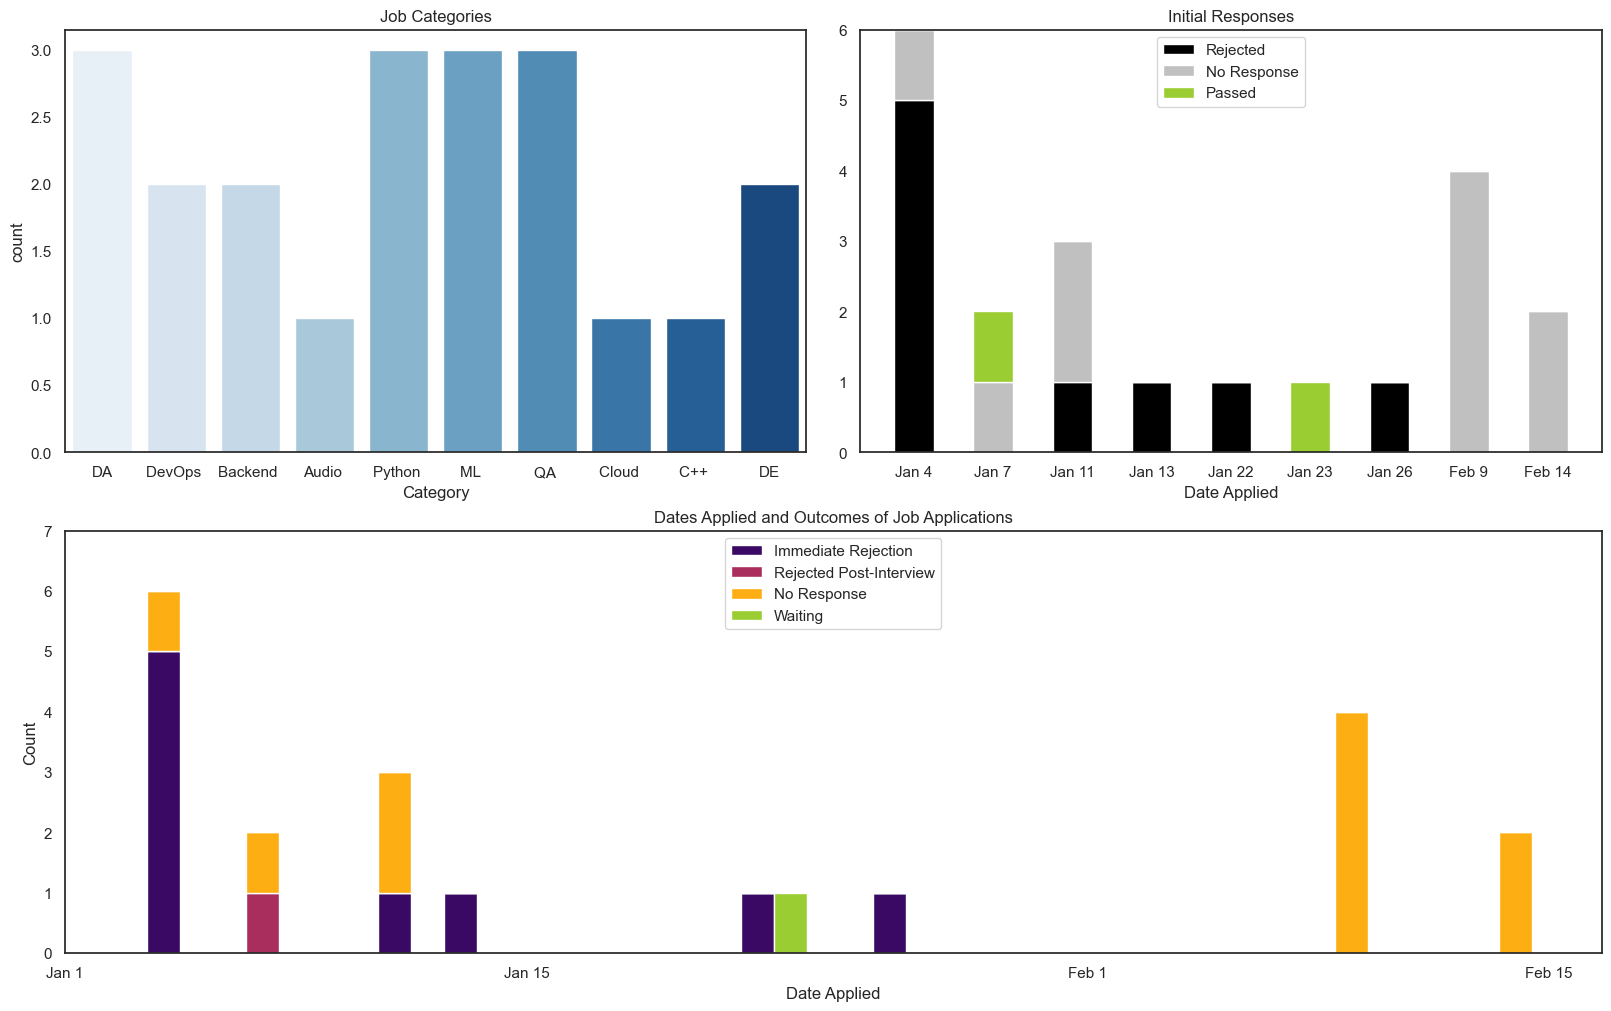

In [4]:
two_by_two()

## Visualizations

### Job Categories

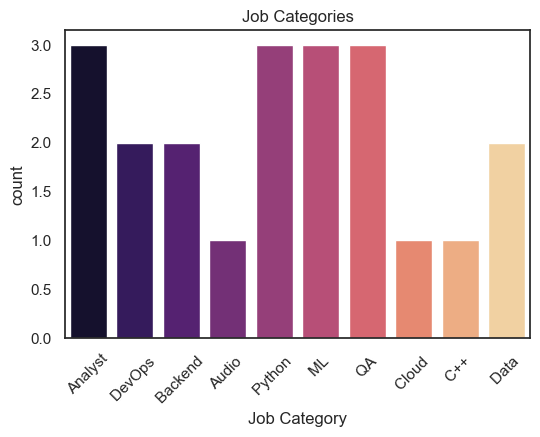

<AxesSubplot:title={'center':'Job Categories'}, xlabel='Job Category', ylabel='count'>

In [ ]:
job_categories()

### Initial Responses by Date

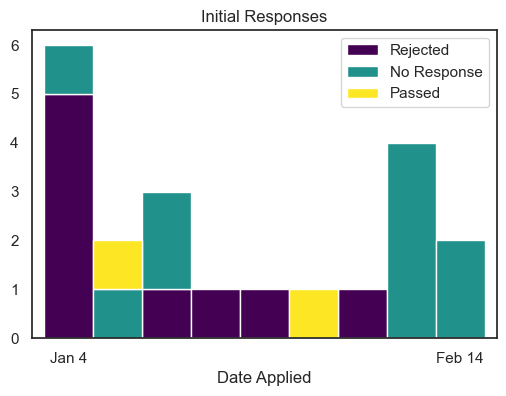

<AxesSubplot:title={'center':'Initial Responses'}, xlabel='Date Applied'>

In [ ]:
initial_responses()

### Timeline of Job Applications and Outcomes

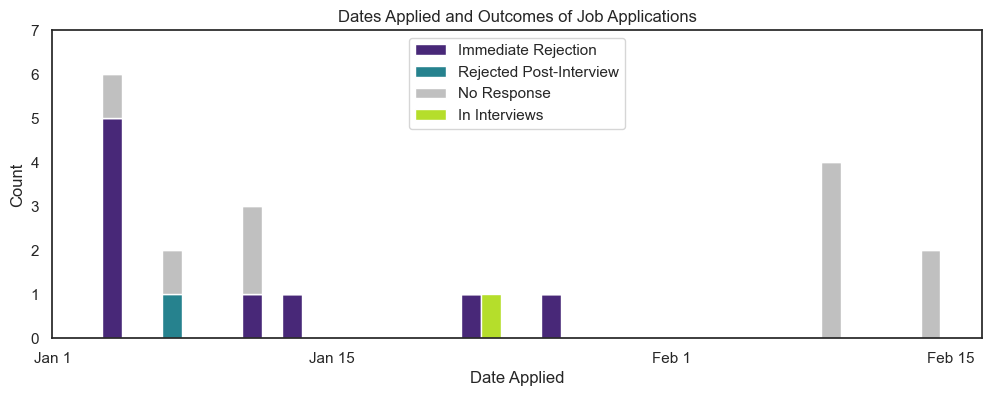

<BarContainer object of 9 artists>

In [ ]:
apps_timeline()

## Input New Data

### Apps

In [ ]:
# app1 = add_app('company_name', 'date_applied', 'job_title',
            #    'job_cat', 'department', 'location', None,
            #    None, 'method', 'url')

### Responses

In [ ]:
# fr_df1 = add_init_response('company_name', 'date_applied', 'Passed', 
#                   'date_init_resp', 'date_interview1', 'interviewers')
# fr_df2 = add_init_response('company_name', 'date_applied', 'Rejected', 'date_init_resp')

### Interview Info

In [ ]:
# int_df1 = add_interview_info('company_name', 'date_applied', 'interview_notes', 'next_steps')

In [ ]:
# m_int_df = add_more_ints('company_name', 'date_applied', 'next_interviews')

### Final Outcomes

In [ ]:
# fo_df1 = add_final_response('company_name', 'date_applied', 'final_outcome', 'feedback')

### Optional Joining of Multiple Added DFs

In [ ]:
# new_jobs_df = concat_dfs(old_jobs_df, [fr_df1, fo_df1, app1])

In [ ]:
# new_jobs_df

## Write to JSON

In [ ]:
# jobs_df = pd.read_json('job_data.json', orient='table')

In [ ]:
# jobs_df = add_to_json(jobs_df)